## Проект по спринту "Принятие решений в бизнесе"

### Описание проекта:
  
  В этом проекте мы выступим в роли аналитика крупного интернет магазина. По подготовленным, вместе с отделом маркетинга, гипотезам для увеличения выручки подготовим, запустим и проведем A/B-тест и проанализируем полученные результаты.
  

#### Этапы проекта:  
  
*Загрузим библиотеки для работы, загрузим данные.* 
 
**Часть 1 - Приоритизация гипотез:**  
1. Применим фраймворки ICE, RICE для приоритизации гипотез. Проанализируем результаты приоритизации  
  
**Часть 2 - результаты A/B теста:**  
1. Загрузим данные. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясним его. Варианты решений:
  - Остановить тест, зафиксировать победу одной из групп.
  - Остановить тест, зафиксировать отсутствие различий между группами.
  - Продолжить тест.

### Загрузка данных и библиотек python для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from datetime import datetime as dt
from scipy import stats as st

In [2]:
try:
    
    hypotesis = pd.read_csv(
        'C:/Users/kiselevvs/Desktop/Data analyst/datasets/hypothesis.csv'
    )
    orders = pd.read_csv(
        'C:/Users/kiselevvs/Desktop/Data analyst/datasets/orders.csv',
        parse_dates=['date'])
    visitors = pd.read_csv('C:/Users/kiselevvs/Desktop/Data analyst/datasets/visitors.csv',
        parse_dates=['date'])
except:
    hypotesis = pd.read_csv(
        'https:/)
    orders = pd.read_csv(
        'https:/, parse_dates=['date'])
    visitors = pd.read_csv('https://, parse_dates=['date'])
    

### Часть 1 - Приоритизация гипотез

In [3]:
display(hypotesis) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypotesis['ICE'] = round((hypotesis['Impact'] * hypotesis['Confidence'] / hypotesis['Efforts']), 2)

In [5]:
display(hypotesis.sort_values('ICE', ascending=False))
pd.set_option('max_colwidth', 200)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Добавили столбик приоритизации гиоптез методом **ICE(impact confidence effort)**.  
Видим, что в тройке лидеров гиоптезы с изначальными индексами 8, 0, 7 

In [6]:
hypotesis['RICE'] = round((hypotesis['Reach'] * hypotesis['Impact'] * hypotesis['Confidence'] / hypotesis['Efforts']), 2)
display(hypotesis.sort_values(['RICE', 'ICE'], ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Добавили столбик приоритизации гипотез методом **RICE(reach impact confidence effort)**.  
Видим, что в тройке лидеров остались гипотезы с индексами 0, 7 и добавилась гипотеза с индексом 2
Гипотеза 8, которая была в тройке лидеров по ICE опустилась на 5 позицию.  
Эти изменения в приоритетности произошли, потому что мы добавили параметр reach, который показывает на какой объем пользователей могут повлиять изменения. Это важный параметр, когда мы достаточно точно можем оценить количество затронутых пользователей.

Выбираем гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", запускаем А/В тест и далее будем анализировать результаты теста

### Часть 2 - результаты A/B теста

In [7]:
orders.info()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
display(orders.head(5))
display(visitors.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders[['transactionId', 'visitorId']].duplicated().sum()

0

In [10]:
visitors.duplicated().sum()

0

Проверили наличие явных дубликатов в столбцах таблицы с заказами и в таблице с информацией о посетителях.  
Явных дубликтатов нет

In [11]:
orders[['visitorId', 'group']].duplicated().sum()

108

In [12]:
test_double_group = orders.pivot_table(values= 'transactionId' ,index= 'visitorId', columns=  'group').reset_index()
test_double_group = test_double_group[~test_double_group.isnull().any(axis=1)]
display(test_double_group.head())
print()
print('Количество пользователей теста, которые попали в обе группы (А и В) составиило :',\
      test_double_group['visitorId'].nunique())

group,visitorId,A,B
2,8300375,4.293856e+09,3.679129e+09
44,199603092,1.799929e+09,4.376570e+08
51,232979603,8.356615e+07,2.670069e+09
55,237748145,2.656568e+09,1.630051e+09
66,276558944,3.894438e+09,1.701654e+09



Количество пользователей теста, которые попали в обе группы (А и В) составиило : 58


**По результатам теста, оказалось, что 58 пользователей попали в обе группы теста, что является нарушением проведения А/В тестирования**.  
Эти данные необходимо передать команде, которая настраивает алгоритмы распределения трафика по группам тестирования

Вывели оба датасета для общей информации о данных

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# создаем таблицу куммулятивных данных о заказах
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
.sort_values(by=['date','group'])
)

# создаем таблицу куммулятивных данных о посетителях
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
.sort_values(by=['date','group'])
)


# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [14]:
print('Минимальная дата по изначальному датасету:', cumulativeData['date'].min()\
      ,'По куммулятивному датасету:', orders['date'].min())
print()
print('Максимальная дата по изначальному датасету:', cumulativeData['date'].max()\
      ,'По куммулятивному датасету:', orders['date'].max())

Минимальная дата по изначальному датасету: 2019-08-01 00:00:00 По куммулятивному датасету: 2019-08-01 00:00:00

Максимальная дата по изначальному датасету: 2019-08-31 00:00:00 По куммулятивному датасету: 2019-08-31 00:00:00


Минимальная и максимальная даты в исходном и куммулятивном датасетах совпадают, значит датафрейм создан корректно

Подготовили данные для дальнейшенго построения графиков

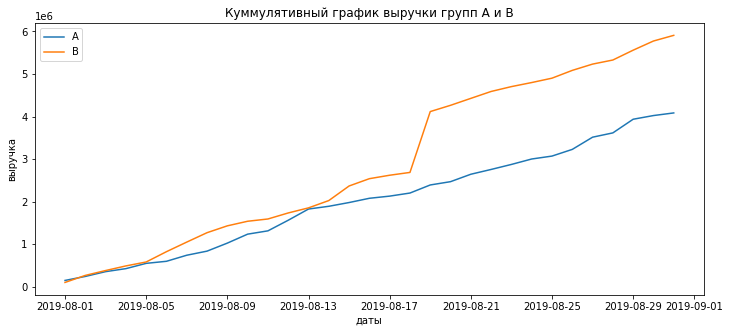

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# задаем размер графика для корректного отображения
plt.figure(figsize=(12,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('даты')
plt.ylabel('выручка')
plt.title('Куммулятивный график выручки групп А и В')
plt.legend();


**Построили график куммулятивной выручки по дня в разбивке по группам теста A/B**  
Видим, что версия теста B на всем протяжении выше по куммулятивной выруче, но в данных присутствует "скачок" от 2019-08-18, который может являться аномалией и вляить на резульатты теста

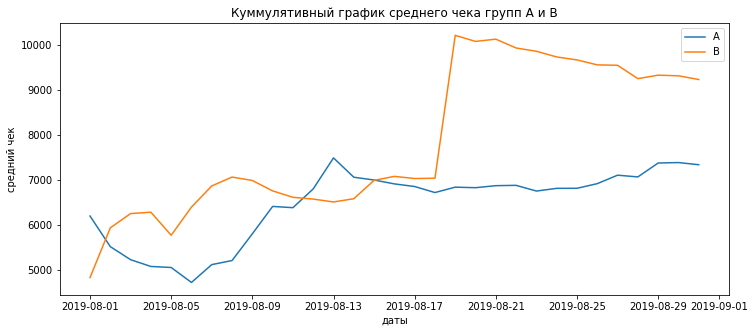

In [16]:
# задаем размер графика для корректного отображения
plt.figure(figsize=(12,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('даты')
plt.ylabel('средний чек')
plt.title('Куммулятивный график среднего чека групп А и В')
plt.legend();

**Построили график куммулятивного среднего чека по дням в разбивке по группам теста A/B**  
Видим похожу картину, В выше на протяжении большей части теста, но в данные есть аномалия, которая может некорректно менять результаты теста. Это может быть всплеском числа заказов 2019-08-18 или большая покупка пользователя, но это существенно меняет результат теста


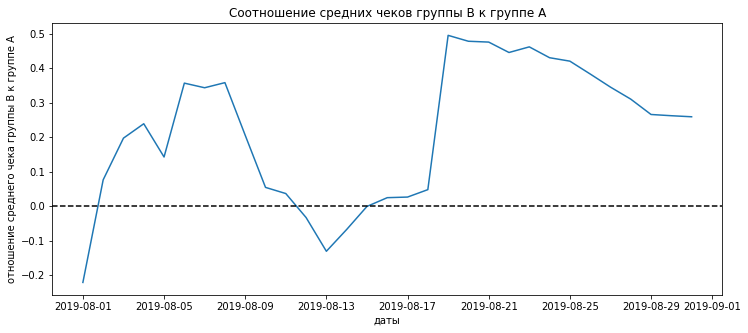

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размер графика для корректного отображения
plt.figure(figsize=(12,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('даты')
plt.ylabel('отношение среднего чека группы В к группе А')
plt.title('Соотношение средних чеков группы В к группе А')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Построили график относительного изменения куммулятивного среднего чека группы В к группе А**  
  
На протяжении большей части теста  график резко "скачет", что информирует о некоторых всплесках в данных (возможно аномалии)

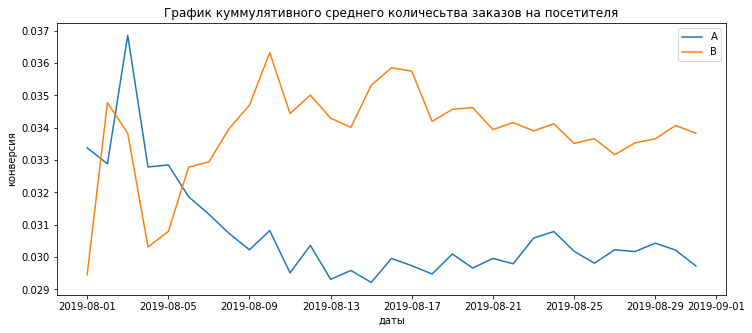

In [18]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# задаем размер графика для корректного отображения
plt.figure(figsize=(12,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('даты')
plt.ylabel('конверсия')
plt.title('График куммулятивного среднего количесьтва заказов на посетителя')
plt.legend();

# задаем масштаб осей
# plt.axis(["2019-08-01", '2019-09-01', 0, 0.015])
# не получилось задать масштаб оси х через команду с мин и макс датой, выходит ошибка:
# ConversionError: Failed to convert value(s) to axis units: '2019-08-01'

**Построили график куммулятивного среднего количества заказов на посетителя по группам**  
  
Видим, что группа теста В находится выше, но также выидим влияние резкого роста, начиная с 2019-08-04, нужно смотреть, что повлияло на этот рост  
ПО группе А вначале теста тоже присущи скачки - сначала вверх, далее вниз до снижения конверсии. Возможно причиной такого скачка вначале теста могут быть некие технические проблемы

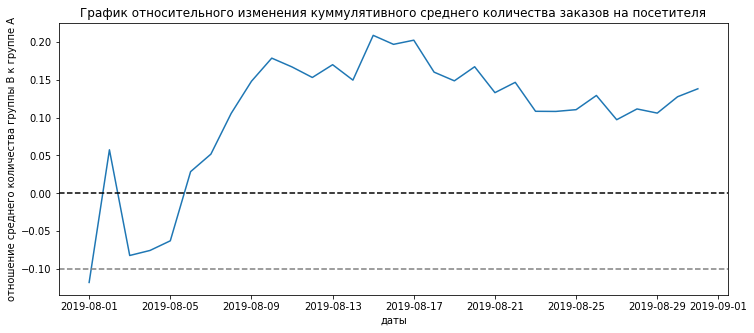

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размер графика для корректного отображения
plt.figure(figsize=(12,5))

plt.plot(
    mergedCumulativeConversions['date'],\
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
);
plt.xlabel('даты')
plt.ylabel('отношение среднего количества группы В к группе А')
plt.title('График относительного изменения куммулятивного среднего количества заказов на посетителя')


plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');


**Построили график относительного изменения куммулятивного количества заказов группы В к группе А**  
  
Вначале теста наблюдались переломы графика, сейчас ситуация стабилизировалсь и среднее количество заказов на пользователя выше у у пользователей группы на 0.15-0.20 раза

In [20]:
# Подсчитаем количество заказов по пользователям

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


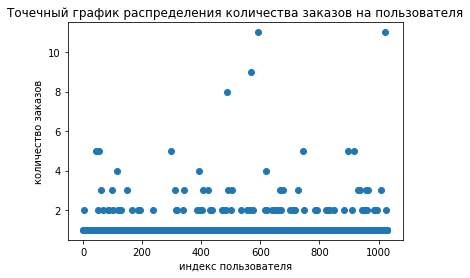

In [21]:
# Построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);
plt.xlabel('индекс пользователя')
plt.ylabel('количество заказов')
plt.title('Точечный график распределения количества заказов на пользователя');

**Построили точечный график количества заказов на одного пользователя**  
  
Видим, что у большинства пользователей количество заказов равно 1, есть некоторое количество с 2-4 заказами, но их доля непотнятна, также есть малая доля пользоватлей с количсетвом заказов больше 4-5 - возможно их стоит считать аномалиями

In [22]:
# Посчитаем 95 и 99 перцентили количества заказов на одного пользователя

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей выполняли более 2 заказов и не более 1% пользователей сделали 4 заказа  
Для дальнейшего анализа теста примем за верхнюю границу количества заказов - 2 включительно. Остальных пользователей с количеством заказов более 2 исключим, чтобы аномальные значения не вляили на результаты нашего теста.

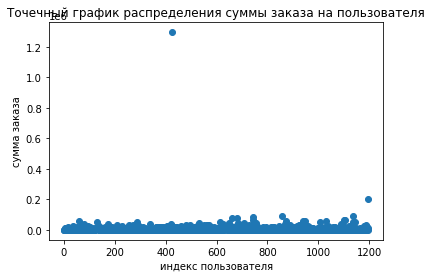

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.xlabel('индекс пользователя')
plt.ylabel('сумма заказа')
plt.title('Точечный график распределения суммы заказа на пользователя');

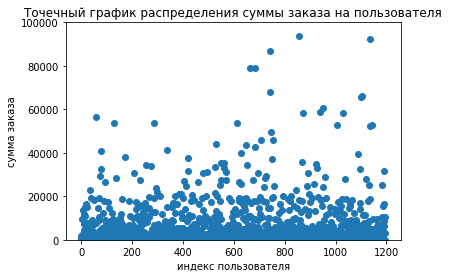

In [24]:
plt.scatter(x_values, orders['revenue']);
plt.ylim(0, 100000)
plt.xlabel('индекс пользователя')
plt.ylabel('сумма заказа')
plt.title('Точечный график распределения суммы заказа на пользователя');

**Построили точечный график стоимости заказов**  
  
Видим, что у большинства пользователей стоимость заказа равна до 40000 р, остальные значения скорее являются аномалиями, далее посмотрим 95 и 99 перцентели, чтобы определить границу анмоальных и нормальных значений

In [25]:
# Посчитаем 95 и 99 перцентили количества заказов на одного пользователя

print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% пользователей имеют сумму чека более 28000 р и не более 1% с сумой чека более 58233.2 р  
Для дальнейшего анализа по "очищенным" данным примем сумму чека не более 28000 р

In [26]:
# Нулевая гипотеза -  распределение является нормальным
# Альтернативная гипотеза -  распределение не является нормальным

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(ordersByUsers['orders'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', "{0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  0.000
Отвергаем нулевую гипотезу: распределение не нормально


In [27]:
# Нулевая гипотеза -  распределение является нормальным
# Альтернативная гипотеза -  распределение не является нормальным

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders['revenue'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', "{0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  0.000
Отвергаем нулевую гипотезу: распределение не нормально


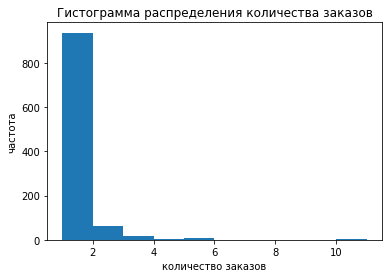

In [28]:
plt.hist(ordersByUsers['orders']);
plt.ylabel('частота')
plt.xlabel('количество заказов')
plt.title('Гистограмма распределения количества заказов');

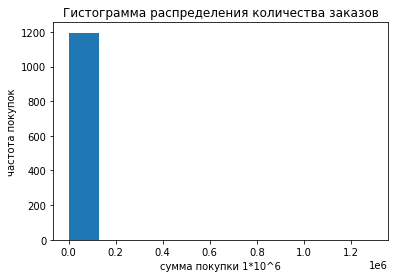

In [29]:
plt.hist(orders['revenue']);
plt.ylabel('частота покупок')
plt.xlabel('сумма покупки 1*10^6')
plt.title('Гистограмма распределения количества заказов');

**Методом st.shapiro(x) проверили, можно ли считать эту переменную нормально распределённой**  
Как и предполагалось, распределение данных не является номральным, поэтому для дальнейшего анализа по "сырым" данным будем применять ***Непараметрический тест Уилкоксона-Манна-Уитни***

### Анализ результатов теста по "сырым" данным

In [30]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [31]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
# Тем, кто ничего не заказал, будут соответствовать нули
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders'
        )
    ],
    axis=0
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                  name='orders'
        )
    ],
    axis=0
)


In [32]:
# Применим Непараметрический тест Уилкоксона-Манна-Уитни
# Проверим статистическую значимость различий в среднем количестве заказов на посетителя

# Нулевая гипотеза -  Различий в среднем количестве заказов на посетителя нет
# Альтернативная гипотеза -  Различия в среднем количестве заказов имеются 

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, отвергаем нулевую гипотезу: между группами есть статистически значимое различие.
</div>

In [33]:
print('Относительное превосходство группы В над группой А в среднем количестве заказов =',\
      "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительное превосходство группы В над группой А в среднем количестве заказов = 0.138


**Провели тест Уилкоксона-Манна-Уитни на определение статистической значимости различия в среднем количестве заказов групп А и В**  
Тест показал статистическую значимость, p-value равн0 0.016 при alpha = 0.05  
Также посмотрели разницу между средними значениями количества заказов групп, по имеющимся данным, она составляет 0.138 в пользу группы В


In [34]:
# проверим статистическую значимость различий в среднем чеке между группами
# Нулевая гипотеза: различий в среднем чеке между группами нет
# Альтернативная гипотеза: различий в среднем чеке между группами есть

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [35]:
print('Относительное превосходство группы В над группой А в среднем чеке =',\
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительное превосходство группы В над группой А в среднем чеке = 0.259


**Провели тест Уилкоксона-Манна-Уитни на определение статистической значимости различия в среднем чеке групп А и В**  
Тест показал, что статистической значимости различия средних чеков нет, p-value равн0 0.73 при alpha = 0.05  
Хотя средний чек группы В выше среднего чека группы А


### Анализ результатов теста по "очищенным" данным

In [36]:
# Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders 
# и пользователей, совершивших заказы дороже 20 000 — usersWithExpensiveOrders 

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего отфильтровали 74 аномальных пользователя с количеством заказов более 2 и/или суммой чека более 28000 р

In [37]:
#отфильтруем данные для дальнейшей работы с "очищенными" данными 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
# Нулевая гипотеза разницы в среднем количестве заказов между группами нет
# Альтернативная гипотеза разница в среденм количестве заказов между группами есть

alpha = 0.05 # критический уровень статистической значимости

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение', results[1])

if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: 
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    

p-значение 0.013042592743036745
Отвергаем нулевую гипотезу: разница статистически значима


In [39]:
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.173


**Провели тест Уилкоксона-Манна-Уитни на определение статистической значимости различия в среднем количестве заказов групп А и В по очищенным данным**  
Тест показал статистическую значимость, p-value равн0 0.013 при alpha = 0.05  
Также посмотрели разницу между средними значениями количества заказов групп, по имеющимся данным, она составляет 0.173 в пользу группы В
***Результаты по среднему количеству заказов по "сырым" данным и по "очищенным" похожи, оба показывают статистическую значимость между группами***

In [40]:
# проверим статистическую значимость различий в среднем чеке между группами
# Нулевая гипотеза: различий в среднем чеке между группами нет
# Альтернативная гипотеза: различий в среднем чеке между группами есть

alpha = 0.05  # критический уровень статистической значимости

revenuea_clear = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']

revenueb_clear = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']
results = st.mannwhitneyu(revenuea_clear, revenueb_clear)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

p-значение:  0.738481751314565
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [41]:
print("{0:.3f}".format(revenueb_clear.mean() / revenuea_clear.mean() - 1))

-0.020


**Провели тест Уилкоксона-Манна-Уитни на определение статистической значимости различия в среднем чеке групп А и В по очищенным данным**  
Тест показал, что статистической значимости различия средних чеков нет, p-value равн0 0.74 при alpha = 0.05  
Также посмотрели разницу между средними значениями чека, по очищенным данным, она составляет 0.02 в пользу группы А
***Результаты по среднему чку по "сырым" данным и по "очищенным" похожи, оба показывают, что статистической значимости нет***


# Общий вывод по проекту спринта "Принятие решений в бизнесе"  
  
### В этом проекте я приоритизировал предложенные гипотезы фраймворками ICE и RICE, а также провел анализ результатов A/B теста

- Построил куммулятивные графики: выручки по группам, среднего чека, график относительного изменения куммулятивного среднего чека группа В к группе А, куммулятивного среднего количества заказов на посетителя по группам, относительного изменения куммулятивного среднего количества заказов. Точечные графики: количества заказов по пользователям, стоимости заказов
- Нашел аномальные (выбивающиеся из общей картины) значения количества заказов на пользователя и суммы заказа 
- Посчитал статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по "сырым" и по "очищенным" данным 

#### На основании полученных результатов анализа А/В теста предлагаю принять рещение об остановке теста и зафиксировать победу группы В:
- По куммулятивному графику выручки по дням между группами теста - группа В уверенно лидирует
- По куммулятивному графику среднего чека по дням в разбивке групп - группа В уверенно лидирует
- По графику относительного тизменения куммулятивного среднего чека - за исключением перелома линии графика в середине теста средний чек группы В выше группы А на 0.2 - 0.5 раза, к окончанию теста линия стабилизировалась и нраходится на уровне около 0.3 дельты в пользу группы В
- По граффику относительного изменения куммулятивного среднего количества заказов на посетителя картина похожая - за исключением перелома вначале теста, группа В уверенно лидирует обгоняя группу А
- По результатам статистических тестов Уилкоксона-Манна-Уитни - разница в среднем количестве заказов на посетителя статистически значима и по "сырым" и по очищенным данным, разница в среднем чеке по статистическим тестам по по "сырым" и по очищенным данным не обнаружена. По имеющимся данным разница в средних значениях чека была 26 процентов в пользу группы В, по "очищенным" данным   разница 2 % НО в пользу группы А, что неявляется существенно значимым, особенно учитываю остальные показатели 

